## Sigma_density

Determining eccentricity using the photoeccentric effect requires transit duration, orbital period, and stellar density. Assuming a spherical star, we need M_star, sigma_M_star and R_star, sigma_R_star to determine density rho_star, sigma_rho_star. 

In this notebook, I will extract M_star, sigma_M_star and R_star, sigma_R_star from the Kepler/Gaia cross-matched data. I will create 2 Gaussians with mean and sigma for mass and radius. Then I will use each value in each Gaussian to calculate the density and sigma_density. I will read sigma_density from the plot.

## All KIC Columns explained: https://exoplanetarchive.ipac.caltech.edu/docs/API_keplerstellar_columns.html

## All Gaia Columns explained: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from pprint import pprint

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

Kepler/Gaia DR2 crossmatched data with 1, 4, and 20 arcsecond radius. I'll use the 1 arcsec radius (for now). 

In [3]:
hdul4as = fits.open('/Users/sheilasagear/Dropbox (UFL)/Research/MetallicityProject/Data/Kepler-Gaia/kepler_dr2_4arcsec.fits')
hdul20as = fits.open('/Users/sheilasagear/Dropbox (UFL)/Research/MetallicityProject/Data/Kepler-Gaia/kepler_dr2_20arcsec.fits')
hdul1as = fits.open('/Users/sheilasagear/Dropbox (UFL)/Research/MetallicityProject/Data/Kepler-Gaia/kepler_dr2_1arcsec.fits')


In [4]:
# Print indices of all data in fits file. Number - 1 at the end of header name is index.
#hdul4as[1].header

Create arrays of masses and radii

In [5]:
from tqdm import tqdm

In [6]:
type(hdul4as)

astropy.io.fits.hdu.hdulist.HDUList

In [7]:
def get_kepID(hdul):
    kepID_lst = []

    for i in tqdm(range(len(hdul[1].data))):
        kepID_lst.append(hdul[1].data[i][96])
        
    return np.asarray(kepID_lst)

In [8]:
def get_masses(hdul):
    mass_lst = []
    masserr1_lst = []
    masserr2_lst = []

    for i in tqdm(range(len(hdul[1].data))):
        mass_lst.append(hdul[1].data[i][122])
        masserr1_lst.append(hdul[1].data[i][123])
        masserr2_lst.append(hdul[1].data[i][124])
        
    return np.asarray(mass_lst), np.asarray(masserr1_lst), np.asarray(masserr2_lst)

In [9]:
def get_radii(hdul, mission='Kepler'):

    rad_lst = []
    raderr1_lst = []
    raderr2_lst = []

    for i in tqdm(range(len(hdul[1].data))):
        
        if mission=='Kepler':
            
            #Kepler radii
            rad_lst.append(hdul[1].data[i][119])
            raderr1_lst.append(hdul[1].data[i][120])
            raderr2_lst.append(hdul[1].data[i][121])
            
        elif mission=='Gaia':

            #Gaia radii
            rad_lst.append(hdul[1].data[i][88])
            raderr1_lst.append(hdul[1].data[i][89])
            raderr2_lst.append(hdul[1].data[i][90])
            
        else:
            raise KeyError("Invalid mission")
            
    return np.asarray(rad_lst), np.asarray(raderr1_lst), np.asarray(raderr2_lst)

In [10]:
def get_logg(hdul):
    logg_lst = []
    loggerr1_lst = []
    loggerr2_lst = []

    for i in tqdm(range(len(hdul[1].data))):
        logg_lst.append(hdul[1].data[i][111])
        loggerr1_lst.append(hdul[1].data[i][112])
        loggerr2_lst.append(hdul[1].data[i][113])
        
    return np.asarray(logg_lst), np.asarray(loggerr1_lst), np.asarray(loggerr2_lst)

In [11]:
logg_lst, loggerr1_lst, loggerr2_lst = get_logg(hdul1as)

100%|██████████| 201312/201312 [00:41<00:00, 4820.74it/s]


In [ ]:
mass_lst, masserr1_lst, masserr2_lst = get_masses(hdul1as)
rad_lst, raderr1_lst, raderr2_lst = get_radii(hdul1as, mission='Kepler')
kepID_lst = get_kepID(hdul1as)

 51%|█████     | 103042/201312 [00:21<00:20, 4910.89it/s]

In [ ]:
rad_lst_gaia, raderr1_lst_gaia, raderr2_lst_gaia = get_radii(hdul1as, mission='Gaia')

In [ ]:
plt.scatter(rad_lst, rad_lst_gaia)
plt.xlabel("Kepler Radii")
plt.ylabel("Gaia Radii")

### Number of targets

In [ ]:
ntargs = len(mass_lst)

## Histograms of entire mass & radius sample

Text(0.5, 0, 'Solar mass')

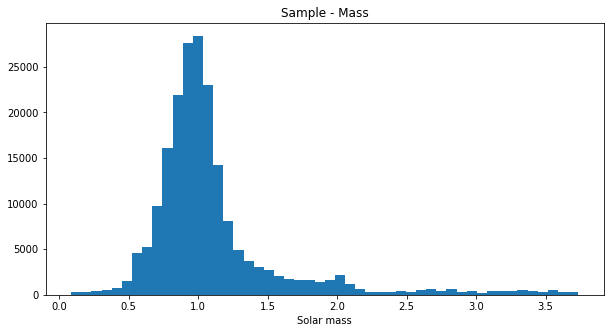

In [44]:
plt.hist(mass_lst, bins=50)
plt.title('Sample - Mass')
plt.xlabel('Solar mass')

Text(0.5, 0, 'Solar radius')

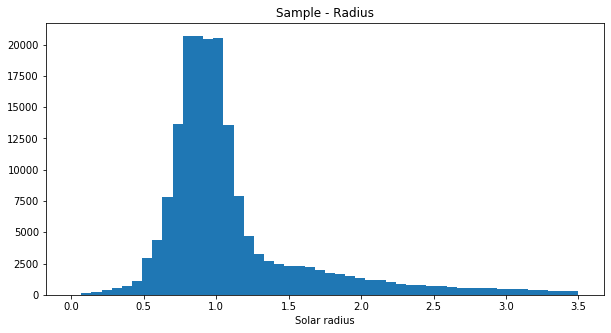

In [45]:
plt.hist(rad_lst, bins=50, range=(0, 3.5))
plt.title('Sample - Radius')
plt.xlabel('Solar radius')

Text(0.5, 0, 'log(g)')

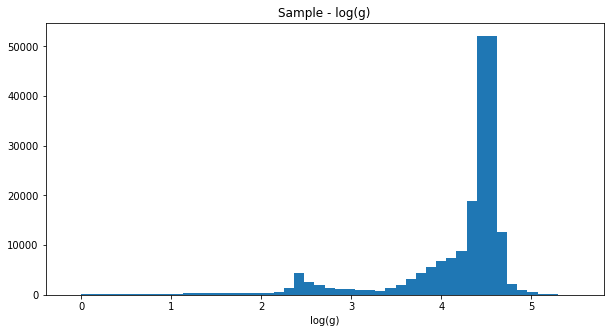

In [46]:
plt.hist(logg_lst, bins=50)
plt.title('Sample - log(g)')
plt.xlabel('log(g)')

## Remove nans

In [47]:
type(mass_lst)

numpy.ndarray

In [51]:
def no_nans(masses, radii, radii2, logg):
    nan_i = []

    for i in range(len(masses)):
        if np.isnan(masses[i]) or np.isnan(radii[i]) or np.isnan(radii2[i]):
            nan_i.append(i)
            
    return nan_i

In [52]:
# Don't run this cell more than once!!
# Don't run this cell more than once!!
# Don't run this cell more than once!!
# Don't run this cell more than once!!
# Don't run this cell more than once!!

nan_i = no_nans(mass_lst, rad_lst, rad_lst_gaia, logg_lst)

#Delete nans from masses

mass_lst = np.delete(mass_lst, nan_i)
masserr1_lst = np.delete(masserr1_lst, nan_i)
masserr2_lst = np.delete(masserr2_lst, nan_i)

#Delete nans from Kepler radii
rad_lst = np.delete(rad_lst, nan_i)
raderr1_lst = np.delete(raderr1_lst, nan_i)
raderr2_lst = np.delete(raderr2_lst, nan_i)

#Delete from Gaia radii
rad_lst_gaia = np.delete(rad_lst_gaia, nan_i)
raderr1_lst_gaia = np.delete(raderr1_lst_gaia, nan_i)
raderr2_lst_gaia = np.delete(raderr2_lst_gaia, nan_i)

#Delete from KepID
kepID_lst = np.delete(kepID_lst, nan_i)

#Delete from log(g)
logg_lst = np.delete(logg_lst, nan_i)

In [53]:
#plt.errorbar(rad_lst_a, rad_lst_gaia, )
#plt.xlabel('Kepler radii')
#plt.xlabel('Gaia radii')

## Define solar density

In [54]:
#Define Solar density for 1 Msol and 1 Rsol in kg/m3
sol_density = ((1.*1.989e30)/((4./3.)*np.pi*1.**3*696.34e6**3))
sol_density

1406.3134952270054

# Find density distributions

Asymmetric Gaussian (?): https://stackoverflow.com/questions/53016469/python-pulling-from-a-normal-distribution-with-asymmetric-error-bars

In [55]:
#ntargs = len(mass_lst)
ntargs = len(mass_lst)//100

In [56]:
ntargs

1787

In [57]:
len(mass_dwarf)

0

In [58]:
def find_density_dist_symmetric(ntargs, masses, masserr1, masserr2, radii, raderr1, raderr2):
    
    rho_dist = np.zeros((ntargs, 1000))
    mass_dist = np.zeros((ntargs, 1000))
    rad_dist = np.zeros((ntargs, 1000))

    #star: indexing star
    #point: indexing PDF point for star
    for star in tqdm(range(ntargs)):
        
        rho_temp = np.zeros(1200)
        mass_temp = np.zeros(1200)
        rad_temp = np.zeros(1200)
        
        #####
        mass_temp = np.random.normal(masses[star], np.mean((abs(masserr2[star]), abs(masserr1[star]))), 1200)
        #len 1200
        rad_temp = np.random.normal(radii[star], np.mean((abs(raderr2[star]), abs(raderr1[star]))), 1200)
        #len 1200
        #####
        
        #for j from 0 to 1200
        #for each point in individual star PDF
        #Adding each density point to rho_temp (specific to this star)
        for point in range(len(mass_temp)):
            #if mass_dist[point] >= 0. and rad_dist[point] >= 0:
            if True:
                rho_temp[point] = density(mass_temp[point], rad_temp[point], sol_density)
                
        #Now rho_temp is a n-long array with this star. We want it to be 1000-long exactly
                                 
        while len(rho_temp) > 1000:
            temp_ind = np.random.randint(0, len(rho_temp)-1)
            rho_temp = np.delete(rho_temp, temp_ind)
            mass_temp = np.delete(mass_temp, temp_ind)
            rad_temp = np.delete(rad_temp, temp_ind)
        else:
            rho_dist[star] = rho_temp
            mass_dist[star] = mass_temp
            rad_dist[star] = rad_temp
    
    return rho_dist, mass_dist, rad_dist
    

In [59]:
mass_dwarf = []
masserr1_dwarf = []
masserr2_dwarf = []
rad_dwarf = []
raderr1_dwarf = []
raderr2_dwarf = []
logg_dwarf = []

for star in range(ntargs):
    if logg_lst[star] > 4.3:
        #print(mass_lst[star])
        #print(logg_lst[star])
        mass_dwarf.append(mass_lst[star])
        masserr1_dwarf.append(masserr1_lst[star])
        masserr2_dwarf.append(masserr2_lst[star])
        rad_dwarf.append(rad_lst[star])
        raderr1_dwarf.append(raderr1_lst[star])
        raderr2_dwarf.append(raderr2_lst[star])
        logg_dwarf.append(logg_lst[star])

In [60]:
ntargs = len(mass_dwarf)

In [61]:
ntargs = 2

In [62]:
def find_density_dist_asymmetric(ntargs, masses, masserr1, masserr2, radii, raderr1, raderr2, logg):
    
    rho_dist = np.zeros((ntargs, 1000))
    mass_dist = np.zeros((ntargs, 1000))
    rad_dist = np.zeros((ntargs, 1000))

    #star: indexing star
    #point: indexing PDF point for star
    for star in tqdm(range(ntargs)):
        
        rho_temp = np.zeros(1200)
        mass_temp = np.zeros(1200)
        rad_temp = np.zeros(1200)

        #####
        mass_temp = asymmetric_gaussian(masses[star], masserr2[star], masserr1[star])
        #len 1200
        rad_temp = asymmetric_gaussian(radii[star], raderr2[star], raderr1[star])
        #len 1200
        #####

        #for j from 0 to 1200
        #for each point in individual star PDF
        #Adding each density point to rho_temp (specific to this star)
        for point in range(len(mass_temp)-1):
            #if (mass_temp[point] >= 0. and rad_temp[point] >= 0):
            if True:
                rho_temp[point] = density(mass_temp[point], rad_temp[point], sol_density)

        #Now rho_temp is a n-long array with this star. We want it to be 1000-long exactly

        while len(rho_temp) > 1000:
            temp_ind = np.random.randint(0, len(rho_temp)-1)
            rho_temp = np.delete(rho_temp, temp_ind)
            mass_temp = np.delete(mass_temp, temp_ind)
            rad_temp = np.delete(rad_temp, temp_ind)
        else:
            rho_dist[star] = rho_temp
            mass_dist[star] = mass_temp
            rad_dist[star] = rad_temp
            
    
    return rho_dist, mass_dist, rad_dist

In [63]:
def asymmetric_gaussian(mean, sigma_minus, sigma_plus):
    
    left = np.random.normal(mean, abs(sigma_minus), 1300)
    right = np.random.normal(mean, abs(sigma_plus), 1300)
    dist_left = left[left<mean]
    dist_right = right[right>=mean]
    dist = np.concatenate((dist_right, dist_left), axis=None)
    
    np.random.shuffle(dist)
    
    while len(dist) > 1200:
        dist = np.delete(dist, [np.random.randint(0, len(dist)-1)])
    else:
        return dist

In [64]:
def density(mass, radius, sol_density):
    """Mass in solar density
    Radius in solar density
    sol_density in kg/m^3"""

    return ((mass*1.989e30)/((4./3.)*np.pi*radius**3*696.34e6**3))/sol_density

In [66]:
rho, mass, radius = find_density_dist_asymmetric(ntargs, mass_dwarf, masserr1_dwarf, masserr2_dwarf, rad_dwarf, raderr1_dwarf, raderr2_dwarf, logg_dwarf)

100%|██████████| 2/2 [00:00<00:00, 26.43it/s]


In [73]:
rho[0]

array([1.58674697, 1.65650106, 1.42556534, 1.55976203, 1.73400479,
       1.43011507, 0.96932331, 1.00672022, 1.70788458, 1.41501436,
       1.32027012, 1.36882302, 1.16772714, 1.15384658, 1.81734642,
       1.13746247, 1.42012752, 1.69165438, 1.50632342, 1.25818739,
       1.62343452, 1.1467028 , 1.46434098, 1.70146494, 1.60220034,
       1.21079666, 1.72067006, 1.28302372, 1.62694801, 1.21586037,
       0.97694131, 1.88124233, 1.73097442, 2.15083474, 1.41348104,
       1.54177731, 1.37235606, 1.7773841 , 1.16075875, 1.2823293 ,
       1.51883784, 1.80858701, 1.55674   , 1.5834758 , 2.08883202,
       1.377229  , 1.90623413, 1.57135765, 1.43692352, 1.71825276,
       1.60603308, 1.26652681, 1.31598205, 1.24325474, 1.09671402,
       1.31580323, 1.48071502, 1.33642917, 1.72225716, 0.83480888,
       1.22549448, 1.54327803, 1.28275604, 1.54304616, 1.03289451,
       1.79430829, 1.57938846, 1.52249202, 1.32845078, 1.05883702,
       1.37853225, 1.66006393, 1.24276292, 1.91742238, 1.52835

In [68]:
plt.scatter(mass[4], radius[4])

IndexError: index 4 is out of bounds for axis 0 with size 2

In [92]:
np.savetxt("rho_neg_vals_included_asymmetric_logg43_1787stars.csv", rho, delimiter=",")

In [93]:
np.savetxt("mass_neg_vals_included_asymmetric_logg43_1787stars.csv", mass, delimiter=",")

In [94]:
np.savetxt("rad_neg_vals_included_asymmetric_logg43_1787stars.csv", radius, delimiter=",")

In [95]:
print(len(kepID_lst))

178751


## Save KIC with same indices as star density distributions.

In [74]:
kepID_lst = kepID_lst[0:1786]

In [76]:
kepID_lst = kepID_lst.reshape(1786,1)

In [77]:
np.savetxt("kepID_neg_vals_included_asymmetric_1787stars.csv", kepID_lst, delimiter=",")